## Import packages

In [67]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Upload IBM HR data from Kaggle

In [68]:
ibm_hr = pd.read_csv("/Users/nataliepong/Desktop/IBM_HR_Analytics.csv")


## Database overview

In [134]:
ibm_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [141]:
print("Commute Range:", ibm_hr["DistanceFromHome"].max() - ibm_hr["DistanceFromHome"].min(), "minutes")
print("Contains negative values:", (ibm_hr["DistanceFromHome"] < 0).any())
print("Contains null values:", ibm_hr.isnull().DistanceFromHome.any())
print("Contains null values:", ibm_hr.isnull().Attrition.any())


Commute Range: 28 minutes
Contains negative values: False
Contains null values: False
Contains null values: False


## Use SQLite

In [142]:
conn = sqlite3.connect(":memory:")
ibm_hr.to_sql("ibm_hr", conn, index=False, if_exists="replace")


1470

In [151]:
query = """
SELECT DistanceFromHome, COUNT(*)
FROM ibm_hr
WHERE DistanceFromHome >= 20
GROUP BY DistanceFromHome
ORDER BY DistanceFromHome
"""


In [180]:
from IPython.display import display

query = """
PRAGMA table_info(ibm_hr)
"""
df = pd.read_sql_query(query, conn)

display(df)


,cid,name,type,notnull,dflt_value,pk
0,0,Age,INTEGER,0,None,0
1,1,Attrition,TEXT,0,None,0
2,2,BusinessTravel,TEXT,0,None,0
3,3,DailyRate,INTEGER,0,None,0
4,4,Department,TEXT,0,None,0
5,5,DistanceFromHome,INTEGER,0,None,0
6,6,Education,INTEGER,0,None,0
7,7,EducationField,TEXT,0,None,0
8,8,EmployeeCount,INTEGER,0,None,0
9,9,EmployeeNumber,INTEGER,0,None,0


## Create buckets in SQL 

In [185]:
query = """
WITH
   current_employee AS
   (SELECT EmployeeNumber, DistanceFromHome
   FROM ibm_hr
   WHERE UPPER(Attrition) = 'No'
   ),
   ex_employee AS
   (SELECT EmployeeNumber, DistanceFromHome
   FROM ibm_hr
   WHERE UPPER(Attrition) = 'Yes'
   )


SELECT  
CASE
   WHEN c.DistanceFromHome <= 5 THEN 'Easy commute'
   WHEN c.DistanceFromHome > 5 AND c.DistanceFromHome < 20 THEN 'Moderate commute'
   WHEN c.DistanceFromHome >= 20 THEN 'Far'
   ELSE 'Unknown'
   END
   AS commute,
   'Current Employee' AS status,
 COUNT(*) AS employee_count
FROM current_employee AS c
GROUP BY commute


UNION ALL


SELECT  
CASE
   WHEN e.DistanceFromHome <= 5 THEN 'Easy commute'
   WHEN e.DistanceFromHome > 5 AND e.DistanceFromHome < 20 THEN 'Moderate commute'
   WHEN e.DistanceFromHome >= 20 THEN 'Far'
   ELSE 'Unknown'
   END
   AS commute,
   'Ex-Employee' AS status,
 COUNT(*) AS employee_count
FROM ex_employee AS e
GROUP BY commute
"""

In [194]:
ibm_hr_df.head()

,commute,status,employee_count
0,Easy commute,Current Employee,972
1,Moderate commute,Current Employee,261
2,Easy commute,Ex-Employee,169
3,Moderate commute,Ex-Employee,68


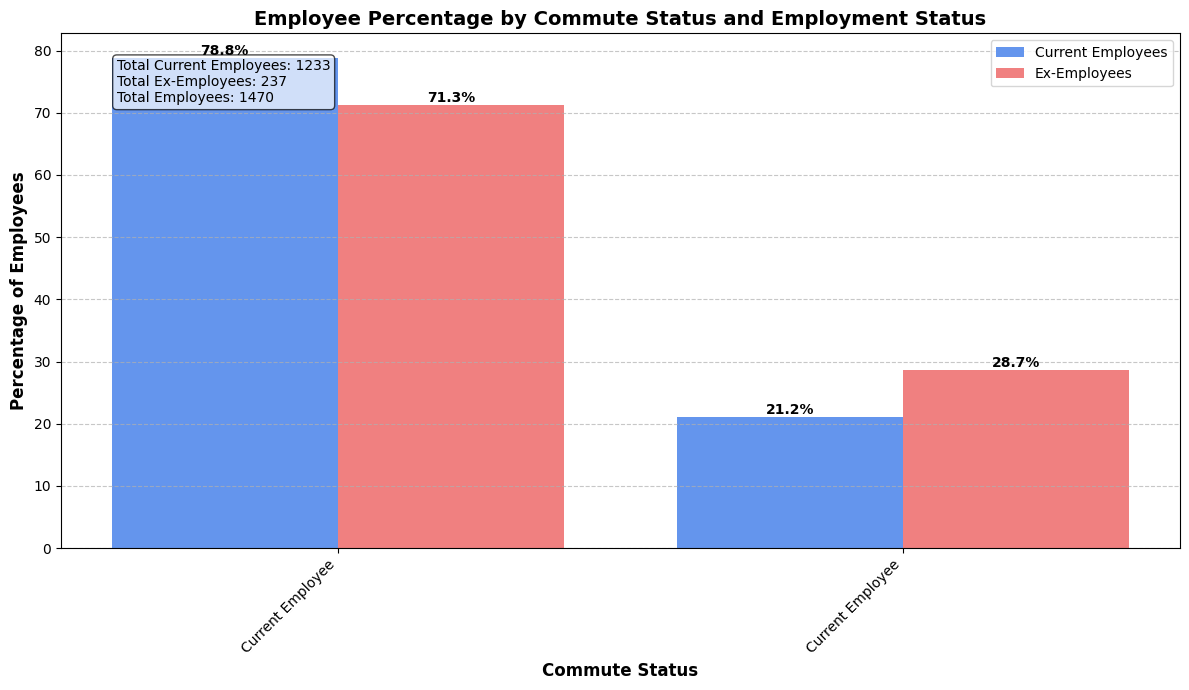

Current Employees Percentages:
Current Employee: 78.8%
Current Employee: 21.2%

Ex-Employees Percentages:
Ex-Employee: 71.3%
Ex-Employee: 28.7%


In [195]:
df = ibm_hr_df

# Calculate percentages for each employee status
current_employees = df[df['status'] == 'Current Employee']
ex_employees = df[df['status'] == 'Ex-Employee']

current_total = current_employees['employee_count'].sum()
ex_total = ex_employees['employee_count'].sum()

current_percentages = current_employees['employee_count'] / current_total * 100
ex_percentages = ex_employees['employee_count'] / ex_total * 100

# Create the plot
plt.figure(figsize=(12, 7))

# Set the positions of the bars on the x-axis
x = range(len(current_employees['status']))

# Create the bars with percentages
current_bars = plt.bar([i-0.2 for i in x], current_percentages, width=0.4, 
        label='Current Employees', color='cornflowerblue', align='center')
ex_bars = plt.bar([i+0.2 for i in x], ex_percentages, width=0.4, 
        label='Ex-Employees', color='lightcoral', align='center')

# Customize the chart
plt.xlabel('Commute Status', fontsize=12, fontweight='bold')
plt.ylabel('Percentage of Employees', fontsize=12, fontweight='bold')
plt.title('Employee Percentage by Commute Status and Employment Status', fontsize=14, fontweight='bold')
plt.xticks(x, current_employees['status'], rotation=45, ha='right')
plt.legend(loc='upper right')

# Add detailed percentage labels on top of each bar
def add_percentage_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}%', 
                 ha='center', va='bottom', fontweight='bold')

add_percentage_labels(current_bars)
add_percentage_labels(ex_bars)

# Add total count information
plt.text(0.05, 0.95, f'Total Current Employees: {current_total}\n'
                      f'Total Ex-Employees: {ex_total}\n'
                      f'Total Employees: {current_total + ex_total}', 
         transform=plt.gca().transAxes, 
         verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print out the exact percentages for reference
print("Current Employees Percentages:")
for status, percentage in zip(current_employees['status'], current_percentages):
    print(f"{status}: {percentage:.1f}%")

print("\nEx-Employees Percentages:")
for status, percentage in zip(ex_employees['status'], ex_percentages):
    print(f"{status}: {percentage:.1f}%")

In [196]:

for status in ibm_hr_df["status"].unique():
    subset = ibm_hr_df[ibm_hr_df["status"] == status]
    bars = ax.bar(subset["commute"], subset["employee_count"], label=status)

    # Adding percentage labels on top of the bars
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        # Get the percentage directly from the subset DataFrame at the corresponding index
        if status == 'Current Employee':
            percent = subset.iloc[i]["percent_current_employees"]
        else:
            percent = subset.iloc[i]["percent_ex_employees"]
        
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

KeyError: 'percent_current_employees'